# Introduction

Studying of machine learning, AI and data science, statistics concepts have been always my elefant in the room.This notebook's main objective is to play arround some of those concepts, simulating a statistical inference process.
We will run a process called $hypothesis$ $testing$.
The process will be devided in these steps.

- Collect Data
- Formulate Null and Alternative and null hypothesis
- Define our Significance Level
- Create a model to fit observed data to a function
- Define confidence levels
- Verify our Null or Alternate hypothesis

I will evaluate how confinement measures affect the growth of infections in each country in the context of the Covid-19 pandemic, during the initial exponential infections wave.
We assume that the initial infections of an outbreak follow an exponential pattern.

First, will take the data about the early evolution of the disease in Brazil, which was characterized by having a policy of free circulation, then I will compare this same evolution to China, which, on the contrary, had a super restrictive policy.
Then, will classify different countries based on their lockdown policies.

The hypothesis that I want to demonstrate (our $null$ $hypothesis$) is that the confinement policy tends to significantly flatten the rate of infections and deaths during the initial phase of a pandemic.

In order to do that we will calculate a coefficient ($k$) that messures the level of infectivity at the early days of a pandemic outbreak.

# Glossary

There are some important statistical concepts that we need to be aware of before running below code.

$k$ $number$: Describes the  exponential growth of a desease in the early stages of an epidemic. (see https://en.wikipedia.org/wiki/Basic_reproduction_number)

$Least$ $square$: The least squares method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.
Least squares regression is used to predict the behavior of dependent variables.
The least squares method provides the overall rationale for the placement of the line of best fit among the data points being studied.

$Exponential$ $growth$: is a process that increases quantity over time. It occurs when the instantaneous rate of change (that is, the derivative) of a quantity with respect to time is proportional to the quantity itself.

$Confidence$ $interval$: displays the probability that a parameter will fall between a pair of values around the mean.
Confidence intervals measure the degree of uncertainty or certainty in a sampling method.
They are most often constructed using confidence levels of 95% or 99%.

$scipy.optimize.curve$_$fit$: Uses non-linear least squares to fit a function, f, to data. It returns two values: $popt$  Optimal values for the parameters so that the sum of the squared error is minimized, and $pcov$,  the estimated covariance of popt. The diagonals provide the variance of the parameter estimate.

$Hypothesis$ $testing$: Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution. First, a tentative assumption is made about the parameter or distribution. This assumption is called the null hypothesis and is denoted by $H(0)$. An alternative hypothesis (denoted $H(a)$), which is the opposite of what is stated in the null hypothesis, is then defined. The hypothesis-testing procedure involves using sample data to determine whether or not $H(0)$ can be rejected. If $H(0)$ is rejected, the statistical conclusion is that the alternative hypothesis $H(a)$ is true.

$Bootstrap$  method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen.

$T-test$: type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features. It is mostly used when the data sets, like the data set recorded as the outcome from flipping a coin 100 times, would follow a normal distribution and may have unknown variances. A t-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

$Significance$ $level$: also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. The researcher determines the significance level before conducting the experiment.
The significance level is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.

Use significance levels during hypothesis testing to help you determine which hypothesis the data support. Compare your p-value to your significance level. If the p-value is less than your significance level, you can reject the null hypothesis and conclude that the effect is statistically significant. In other words, the evidence in your sample is strong enough to be able to reject the null hypothesis at the population level.

$Sources: Wikipedia, Investopedia, Britannica, statisticsbyjim.com$

In [22]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
#from google.colab import drive
from scipy.optimize import curve_fit
from statistics import stdev
from scipy.stats import sem
import math
import statistics
from scipy import stats

In [23]:
data=pd.read_csv('datos_covid.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130595,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
130596,ZWE,Africa,Zimbabwe,2021-10-30,132926.0,0.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
130597,ZWE,Africa,Zimbabwe,2021-10-31,132977.0,51.0,46.571,4678.0,3.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
130598,ZWE,Africa,Zimbabwe,2021-11-01,133007.0,30.0,45.571,4679.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [24]:
countries=data['location']
confirmed=data['total_cases']

In [25]:
#exponencial fit
def exponential(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

https://www.youtube.com/watch?v=Kas0tIxDvrg

# Data Preparation

Will start removing not used columns

In [26]:
data.drop(columns=['iso_code','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'],inplace=True)

In [27]:
countries=data['location'] #cargo el vector de countries
confirmed=data['total_cases'] #carga vector todos los casos confirmed
new=data['new_cases']

In [28]:
ind_bra=np.where(countries=='Brazil')
ind_chi=np.where(countries=='China')

In [40]:
type(countries)

pandas.core.series.Series

# Analysis

Let's start with Brazil and China, who had opposite confinement policies

In [19]:
ind_bra=np.where(countries=='Brazil')
ind_chi=np.where(countries=='China')
ind_bra=ind_bra[0]
ind_chi=ind_chi[0]
new_bra=new[ind_bra]
new_chi=new[ind_chi]
cases_bra=confirmed[ind_bra]
cases_chi=confirmed[ind_chi]
days_bra=np.arange(0,len(cases_bra))
days_chi=np.arange(0,len(cases_chi))
#days=np.arange(0,len(cases_bra))
#plt.plot(days,cases_bra)
#plt.xlabel('days')
#plt.ylabel('cantidad de casos')

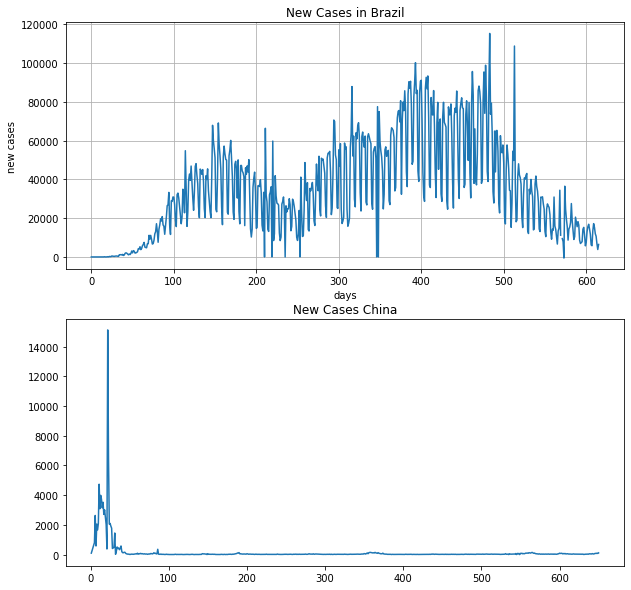

In [9]:
fig, axs = plt.subplots(2,1,figsize=(10,10))
plt.title('New Cases Brazil')
axs[0].title.set_text('New Cases in Brazil')
axs[0].plot(days_bra,new_bra)
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('days')
axs[0].set_ylabel('new cases')

plt.title('New Cases China')
axs[0].grid(True)

axs[1].plot(days_chi,new_chi)
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('coherence')

#fig.tight_layout()
plt.show()

It does not require much analysis to realize that the difference between the new cases in Brazil and China is huge. 
China had exponential growth around day 40, but it dropped off sharply. Obviously, it is necessary to study the data more deeply and take samples from other countries to reach a conclusion. There could be other factors that determined the sharp drop in cases in China. Our next exercise consists of calculating the k-index for both countries, and then verifying if this index is similar to other countries with a similar quarantine policy. The k of exponential growth can be obtained using two algorithms: least squares and maximum likelihood (this article provides a good comparison of the two: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/reliability/supporting-topics/estimation-methods/least-squares-and-maximum-likelihood-estimation-methods/). In our case, and since we do not have a massive amount of data to justify otherwise, we are going to use the method of least squares.

In [51]:
ind_bra=np.where(countries=='Brazil')
ind_bra=ind_bra[0]
cases_bra=confirmed[ind_bra]
days=np.arange(0,len(cases_bra))
start_cases=cases_bra[0:130]
start_days=days[0:130]
popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=1000)
popt

array([ 3.79846721e-02, -2.48818399e+02])

Let's see how the exponential growth of the beginning of the pandemic in both countries compares with the simulated growth that we obtain from their k value.

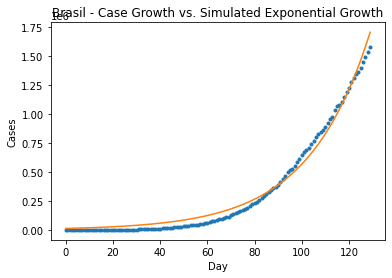

In [11]:
k=popt[0]
t0=popt[1]
cases_simu=exponential(start_days,k,t0)
plt.title('Brasil - Case Growth vs. Simulated Exponential Growth')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.plot(start_days,start_cases,'.')
plt.plot(start_days,cases_simu)

In [12]:
ind_chi=np.where(countries=='China')
ind_chi=ind_chi[0]
cases_chi=confirmed[ind_chi]
days=np.arange(0,len(cases_chi))
start_cases=cases_chi[0:20]
start_days=days[0:20]
popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=700)
popt

array([  0.14538686, -55.1068609 ])

0.1453868584698689


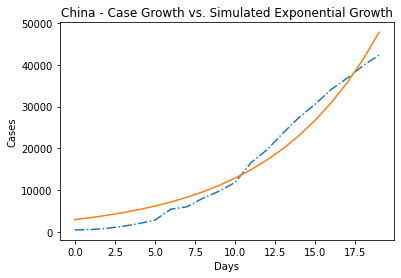

In [12]:
k=popt[0]
t0=popt[1]
cases_simu=exponential(start_days,k,t0)
plt.title('China - Case Growth vs. Simulated Exponential Growth')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(start_days,start_cases,'-.')
plt.plot(start_days,cases_simu)
print(k)

We observe that the fit of the accumulated cases of Brazil strongly coincides with the simulation made using the k obtained during the first 120 days of the pandemic. While in the case of China this happens only in the first 20 days.

In other words, Brazil continues its explosive growth until at least day 120, when it stabilizes slightly and grows strongly again. Instead, China's exponential growth is concentrated in the first 20 days of the pandemic.

Before proceeding with generalizations, it would be advisable to know our confidence interval for the coefficients k obtained.

In the following exercise, we fit the data for Sweden and the UK, which are examples of countries whose lockdown measures were almost non-existent in the first phase and openly opted for so-called herd immunity. 

In [177]:
ind_swe=np.where(countries=='Sweden')
ind_swe=ind_swe[0]
cases_swe=confirmed[ind_swe]
days=np.arange(0,len(cases_swe))
start_cases=cases_swe[0:150]
start_days=days[0:150]
popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=700)
popt

array([ 2.35455440e-02, -3.26945016e+02])

0.023545544031377943


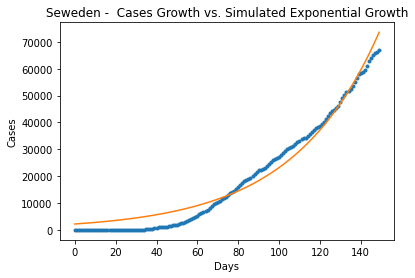

In [178]:
k=popt[0]
t0=popt[1]
cases_simu=exponential(start_days,k,t0)
plt.title('Seweden -  Cases Growth vs. Simulated Exponential Growth')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(start_days,start_cases,'.')
plt.plot(start_days,cases_simu)
print(k)

In [179]:
ind_uk=np.where(countries=='United Kingdom')
ind_uk=ind_uk[0]
cases_uk=confirmed[ind_uk]
days=np.arange(0,len(cases_uk))
start_cases=cases_uk[50:150]
start_days=days[50:150]
popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=2000)
popt

array([ 1.41553648e-02, -7.51458287e+02])

0.014155364812288278


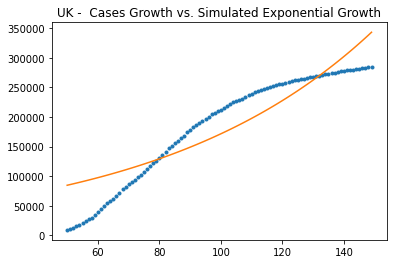

In [180]:
k=popt[0]
t0=popt[1]
plt.title('UK -  Cases Growth vs. Simulated Exponential Growth')
cases_simu=exponential(start_days,k,t0)
plt.plot(start_days,start_cases,'.')
plt.plot(start_days,cases_simu)
print(k)

We observe that Sweden had a behavior similar to that of Brazil, although the real results do not fit the exponential simulation as strongly, between days 70 and 130 they seem to follow a linear pattern.

Surprisingly, in the case of the UK, growth looks more like a logarithmic curve 

Now let's repeat the exercise with Laos, a country that follows the confinement policy of its neighbor China.

In [15]:
ind_lao=np.where(countries=='Laos')
ind_lao=ind_lao[0]
cases_lao=confirmed[ind_lao]
days=np.arange(0,len(cases_lao))
start_cases=cases_lao[0:20]
start_days=days[0:20]
popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=1000)
popt

array([  0.07247271, -21.87070167])

0.07247270785166691

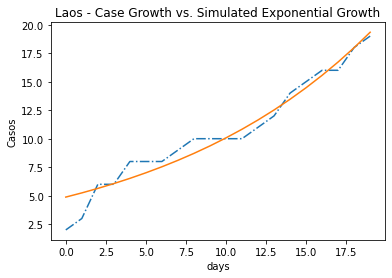

In [16]:
k=popt[0]
t0=popt[1]
cases_simu=exponential(start_days,k,t0)
plt.title('Laos - Case Growth vs. Simulated Exponential Growth')
plt.xlabel('days')
plt.ylabel('Casos')
plt.plot(start_days,start_cases,'-.')
plt.plot(start_days,cases_simu)
k

Laos followed a draconian lockdown policy, like the one seen at the start of the pandemic in China. We observed that the growth of the disease had identical behavior. An exponential growth only the first 20 days, to remain on a plateau thereafter 


So, we observe that the coefficient k, in the cases that we analyze, is lower when the countries adopt a more aggressive confinement policy. And conversely, it grows when countries are more permissive regarding the free movement of their citizens. The following exercise calculates the k-value of various countries and compares them with the journalistic information that I was able to obtain regarding quarantine policies.
In order to classify the countries in terms of the application of movement restriction measures, we are going to take the data from the following site: https://ourworldindata.org/grapher/covid-stringency-index?tab=table&time=2020-01-22..2021-12-05
We assume for example that Brazil, UK and Sweden allowed free movement, China, Brunei and Laos on the other side, were very restrictive and US, Italy and Norway had a balanced position.

In [118]:
countries
list1=[]
list2=[]
countries_uniq=countries.unique()
#countries_uniq.remove('Africa')
#lista.remove('Africa')
countries_uniq=['China','United Kingdom','Brazil','Sweden','Laos','Italy','Norway','United States','Brunei','Japan','Singapore','Nigeria','Iran','Tanzania']

In [119]:
for country in countries_uniq:
    idx=np.where(countries==country)
    idx=idx[0]
    cases=confirmed[idx]
    days=np.arange(0,len(cases))
    start_cases=cases[0:150]
    start_days=days[0:150]
    popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=700)
    k=popt[0]
    list1.append(country)
    list2.append(k)

In [120]:
k_by_country=pd.DataFrame({'country':list1,'k':list2})

In [121]:
k_by_country

,country,k
0,China,0.004287
1,United Kingdom,0.017703
2,Brazil,0.029825
3,Sweden,0.023546
4,Laos,0.002598
5,Italy,0.013373
6,Norway,0.007708
7,United States,0.022808
8,Brunei,0.002734
9,Japan,0.018310


In [122]:
k_by_country.sort_values('k',inplace=True)

I get the average k of my sample (I may need it in the hypothesis test) 

In [123]:
k_sample_mean=k_by_country.k.mean()
k_sample_mean

0.015744557303194743

The following graph shows the k of the sample of countries chosen 

C:\Users\jose.brunfman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


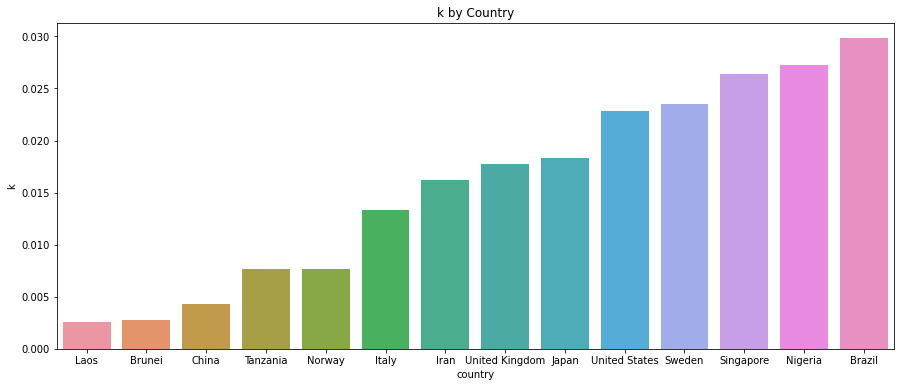

In [124]:
plt.figure(figsize = (15,6))
plt.title('k by Country')
sns.barplot(k_by_country.country,k_by_country.k,dodge=False);

In [125]:
#Retrictivos
countries
list1=[]
list2=[]
countries_uniq=countries.unique()
countries_uniq=['China','Laos','Norway','Brunei','Singapore']
for country in countries_uniq:
    idx=np.where(countries==country)
    idx=idx[0]
    cases=confirmed[idx]
    days=np.arange(0,len(cases))
    start_cases=cases[0:150]
    start_days=days[0:150]
    popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=700)
    k=popt[0]
    list1.append(country)
    list2.append(k)
k_by_country_cua=pd.DataFrame({'country':list1,'k':list2})
k_cuarentena_mean=k_by_country_cua.k.mean()
k_cuarentena_mean

0.00874708826504641

In [126]:
#Permisivos
countries
list1=[]
list2=[]
countries_uniq=countries.unique()
countries_uniq=['United States','Brazil','Sweden','Japan','Nigeria','United Kingdom']
for country in countries_uniq:
    idx=np.where(countries==country)
    idx=idx[0]
    cases=confirmed[idx]
    days=np.arange(0,len(cases))
    start_cases=cases[0:150]
    start_days=days[0:150]
    popt, pcov = curve_fit(exponential, start_days, start_cases,maxfev=700)
    k=popt[0]
    list1.append(country)
    list2.append(k)
k_by_country_sincua=pd.DataFrame({'country':list1,'k':list2})
k_sincuarentena_mean=k_by_country_sincua.k.mean()
k_sincuarentena_mean

0.023236938905863855

In [137]:
print('the average k of my sample is ', k_sample_mean)
print('The average k of strict quarenteen restriction countries is g', k_cuarentena_mean)
print('The average k of non-strict quarenteen restriction countries is ', k_sincuarentena_mean)
print('The average k non-strict quarenteen countries is ',round(((k_sincuarentena_mean-k_cuarentena_mean)/k_cuarentena_mean)*100,0),' percent greater')

the average k of my sample is  0.015744557303194743
The average k of strict quarenteen restriction countries is g 0.00874708826504641
The average k of non-strict quarenteen restriction countries is  0.023236938905863855
The average k non-strict quarenteen countries is  166.0  percent greater


## Confidence Intervals  

 I was able to establish the k that would apply on average for countries with strict quarantine (0.00874), the next step is to establish confidence intervals for that value.

Since we do not have population data (mean and standard deviation, normality of the distribution), we will use the bootstrapping method 

In [17]:
#Función para hacer remuestreo de los datos 
def resample(data):
  resamp=np.zeros(len(data))
  i=0
  while i<len(data*1000000):
    resamp[i]=data[np.random.randint(len(data))]
    i=i+1

  return resamp  


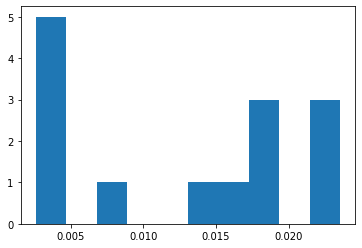

In [139]:
#save multiple results for resamples of sample data
data_rem=resample(k_by_country.k)
plt.hist(data_rem);

In [130]:
mu_resamp=np.mean(data_rem)
print(mu_resamp)
print('Confidence Interval is ',np.quantile(data_rem,0.975),np.quantile(data_rem,0.025))

0.017209739532826875
Confidence Interval is  0.026962768082300744 0.0025981075488244604


## Hypothesis Test 

We are in a position to submit our statement to a hypothesis test. For that, I am going to apply the T-test method.

In [131]:
stats.ttest_ind(k_by_country_cua.k, k_by_country_sincua.k)

Ttest_indResult(statistic=-3.143871626490102, pvalue=0.01185390489308058)

# Summary
According to the result obtained in the T-test, our p-value is equal to 0.012; which is definitely lower than the standard level of significance (0.05).

Then, we can reject the alternative hypothesis and affirm that $there$  $is$  $evidence$ that countries that apply measures to restrict movement in the first phase of the pandemic achieve a better result in terms of exponential growth.

##### In other words, we can predict the k (infectivity) of an outbreak based on the policy that a country applies, always within the calculated confidence interval. 
